In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Ornstein-Uhlenbeck Environment

Discrétisation en utilisant Schéma d'Euler

In [2]:
n = 10000
T = 10
dt = T/n
mu = 0.5
theta = 0.5
sigma = 0.5
X_0 = 1

In [3]:
X = np.zeros(n+1)
X[0] = X_0
for i in range(1,n+1):
    X[i] = X[i-1] + theta*(mu - X[i-1])*dt + sigma*np.random.normal(0,math.sqrt(dt))

X = np.array(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


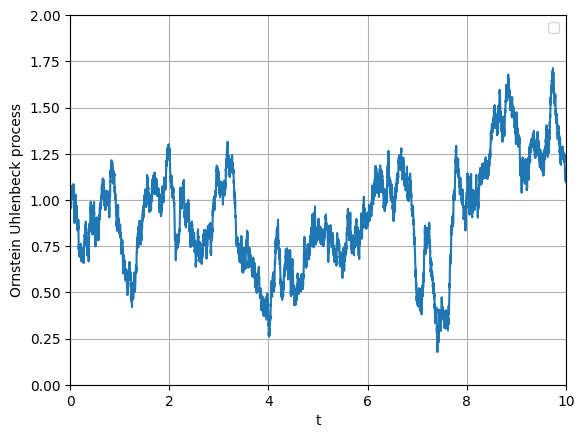

In [4]:
plot = plt.plot(np.linspace(0,T,n+1),X)
plt.xlim(0,T)
plt.ylim(0,2)
plt.xlabel('t')
plt.ylabel('Ornstein Uhlenbeck process')
plt.legend()
plt.grid(True)

plt.savefig('img/OU_imm.png')

# Hawkes in random environment

On simule d'abord l'environnement aléatoire, et on interpole ensuite la valeur de l'environnement au temps de naissance de l'individu. Il suffit de multiplier l'intensité du poisson d'un individu (1/2 dans le cas environnement constant) par la valeur de X au T de naissance.

In [5]:
# Paramètres de l'environnement de simulation :
n = 10000
Lambda_init = 1
Tmax = 50
dt = Tmax/n
mu = 0.7
theta = 0.5
sigma = 0.3
X_0 = 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


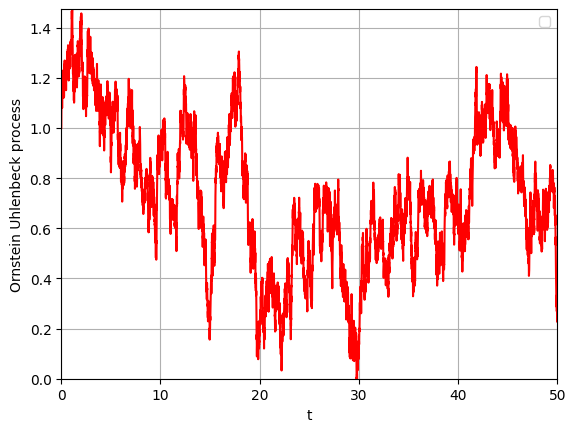

In [14]:
X = np.zeros(n+1)
X[0] = X_0
for i in range(1,n+1):
    X[i] = X[i-1] + theta*(mu - X[i-1])*dt + sigma*np.random.normal(0,math.sqrt(dt))
    if X[i] < 0:
        X[i] = 0

X = np.array(X)

plot = plt.plot(np.linspace(0, Tmax, len(X)),X, color='red')
plt.xlim(0,Tmax)
plt.ylim(0,max(X))
plt.xlabel('t')
plt.ylabel('Ornstein Uhlenbeck process')
plt.legend()
plt.grid(True)

In [15]:
# We define a function that returns the environment for a given time t using linear interpolation
def env(t):
    return X[int(t/dt)] + (X[int(t/dt)+1] - X[int(t/dt)])*(t/dt - int(t/dt))

In [20]:
immigrants = np.random.poisson(Lambda_init * Tmax)
hawkes = np.sort(np.random.uniform(0, Tmax, immigrants))
print("Nombre d'immigrants : " + str(immigrants))
times = hawkes
i = 1

while len(times) != 0:
    # We first get the number of childs for each individual
    num_childs = [np.random.poisson(0.5*env(root)) for root in times] 
    print("Nombre d'individus de la génération " + str(i) + " : " + str(len(times)))
    # end condition
    if(num_childs == [0]*len(times)):
        break
    
    # We remove individuals without childs
    times = [times[i] for i in range(len(times)) if num_childs[i] > 0]
    num_childs = [num_childs[i] for i in range(len(num_childs)) if num_childs[i] > 0]
    
    # We then create the next generation time vector
    times = [times[j] + np.random.exponential(1/2) for j in range(len(times)) for i in range(num_childs[j])] 
    
    times = [val for val in times if val < Tmax]
    
    # We finally update the Hawkes vector 
    hawkes = np.append(hawkes, times) 
    i = i+1
hawkes = np.sort(hawkes)

Nombre d'immigrants : 50
Nombre d'individus de la génération 1 : 50
Nombre d'individus de la génération 2 : 18
Nombre d'individus de la génération 3 : 10
Nombre d'individus de la génération 4 : 2


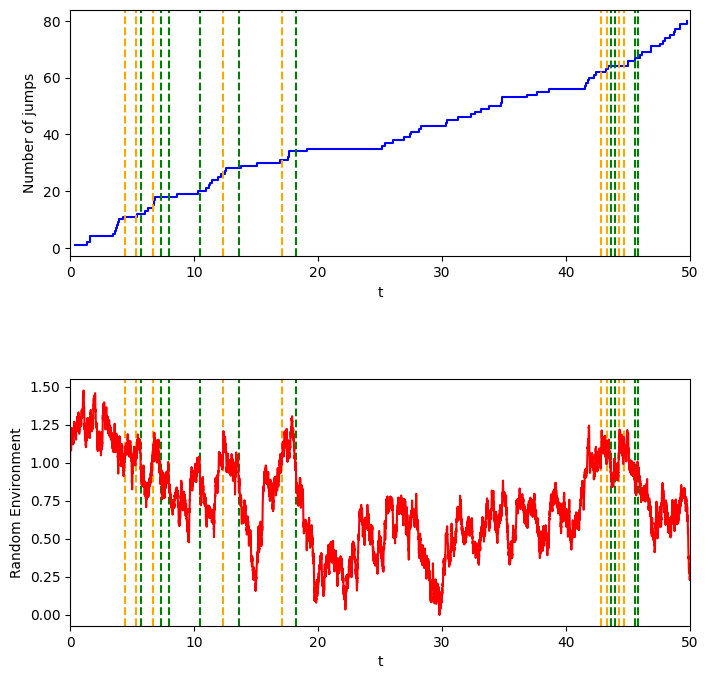

In [22]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot the existing step plot
ax1.step(hawkes, np.arange(1, len(hawkes) + 1), where='post', color='blue')
ax1.set_xlim(0, Tmax)
ax1.set_xlabel('t')
ax1.set_ylabel('Number of jumps')

# Add vertical bars when X goes from over 1 to under 1
for i in range(len(X) - 50):
    if all(X[i+j] < 1 for j in range(1,50)) and X[i] > 1:
        ax1.axvline(x=(i+10)*dt, color='green', linestyle='--')
        ax2.axvline(x=(i+10)*dt, color='green', linestyle='--')

# Add vertical bars when X goes from under 1 to over 1
for i in range(len(X) - 50):
    if all(X[i+j] > 1 for j in range(1,50)) and X[i] < 1:
        ax1.axvline(x=(i+10)*dt, color='orange', linestyle='--')
        ax2.axvline(x=(i+10)*dt, color='orange', linestyle='--')

# Plot the random environment X
ax2.plot(np.linspace(0, Tmax, len(X)),X, color='red')
ax2.set_xlim(0, Tmax)
ax2.set_xlabel('t')
ax2.set_ylabel('Random Environment')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Save and display the figure
plt.savefig('img/hawkes_and_OU.png')
plt.show()